<a href="https://colab.research.google.com/github/A-jha/TENSOR-FLOW-LAB/blob/master/01_Neural_Network_Regration_Wth_TensoFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network regression with Tensorflow

## What is Regression ?
Predicting a numerical a variable based on some other combination of variables, even shorter... predicting a number.

In Statistical modeling, regression analysis is a set of Statistical processes for estimating the relationship between dependent (output varible) and one or more independent variable.

Example : You are a small Restaurant owner . Tip are the best way to keep happy the waiters.
- Tip value depends on total bill.
- Now You would like to develop a model that will allow you to predics amount of bill.

**Residual :** The distance from best fit line to actual value is called residual / error.
  - Residual  always sumups to 0 .
  - A good reggression model minimizes the SSE (Sum of Squared error).

**Note :** The best bit regression line must pass through centroid.



In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


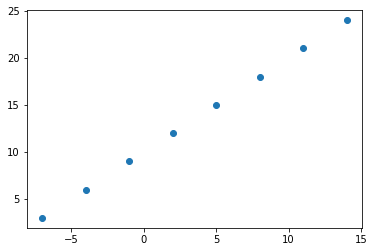

In [2]:
## Create some data 
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create a label
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,Y)

In [ ]:
# Relation between X and Y
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [ ]:
# create a dummy data for housing price prediction
house_info = tf.constant(["beedroom", "bathroom", "garage"])
house_price = tf.constant([934500]) 
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([934500], dtype=int32)>)

In [ ]:
# Turn Numpy array into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X,Y
tf.cast(X,dtype=tf.float32)
tf.cast(Y,dtype=tf.float32)

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [ ]:
#Here we have input as scaler and output as Scaler
input_shape = X[0].shape
output_shape = Y[0].shape 
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in Modeling with Tensorflow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - 
  - define loss function (in other words, the function which tells our model how wrong it is)
  - The optimzer (tells our model how to improve the patterns its learning)
  - evaluation matrix (what we can use to interpret the performance of our model)
3. **Fitting a model**- letting the model to fins pattern between X and Y(features and labels)
  - epochs - How many time our model will go through all the training example.

**mae :**- mean absolute error

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss= tf.keras.losses.mae, # mae - mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd - stochasitc gradient descent
              metrics = ["mae"]             
)

# fit the model
model.fit(X,Y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 619ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make prediction using model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving Model
We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might the optimization  function or learning rate of the optimization function.

3. **Fitting a model** - Here we might fit a model for more epochs(leave it training for long) or add more data to learn from.

In [ ]:
# Let's rebuild our model
#1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = "mae",
              metrics =[ "mae"])

# fit the model
model.fit(X,Y,epochs = 200,verbose=0)

In [ ]:
# Our Data
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# lets predict with improved model
model.predict([17.0])

array([[30.489859]], dtype=float32)

In [ ]:
# let's add  more layer to our model to improve it
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer= tf.keras.optimizers.SGD(),
              loss = "mae",
              metrics = ["mae"])

model.fit(X,Y,epochs = 100,verbose=0)

In [ ]:
 # lets predict
 model.predict([17.0])

array([[32.258904]], dtype=float32)

In [ ]:
# Change the optimizer to improve our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100, activation = "relu"),
                             tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = "mae",
    metrics = ["mae"]
)

model.fit(X,Y,epochs =100,verbose=0)

In [ ]:
# predict again
model.predict([17.0])

array([[27.83362]], dtype=float32)

### Evaluate the model
When it comes to evaluation ... there are three words to say:
> "Visualize , visualize, visualize "

It's good idea to visualize:
- The data - what data are we working with ? what does it look like ?
- The model itself - what does our model look like ?
- The training of a model - how does a model performs while it learns ?
- The prediction of the model - how do the prediction of model lineup agains thew ground truth ?
 

In [ ]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

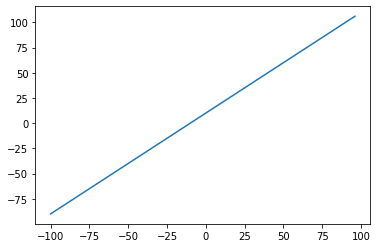

In [ ]:
# visualize the data
plt.plot(X,Y)

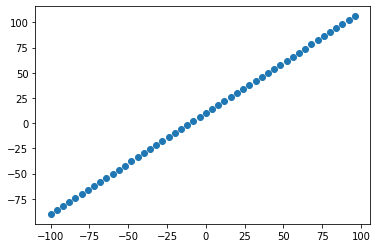

In [ ]:
# scatter plot
plt.scatter(X,Y)

### The 3 sets . . 
- Training Sets - the models learn from this data (70-80 %)
- Validation set - The model gets tuned on this data, which is 10 to 15 %
- Test Set - The model gets evaluated on this data to test what it has learned 10 to 15 %

In [ ]:
# check the length of sample
len(X)

50

In [ ]:
# Split data into training and testing dataset
X_train = X[:40]
X_test = X[40:]

Y_train = Y[:40]
Y_test = Y[40:]

len(X_train) , len(X_test)

(40, 10)

# Visualizing the data
Now we've got our data in training and test sets... let's visualize it

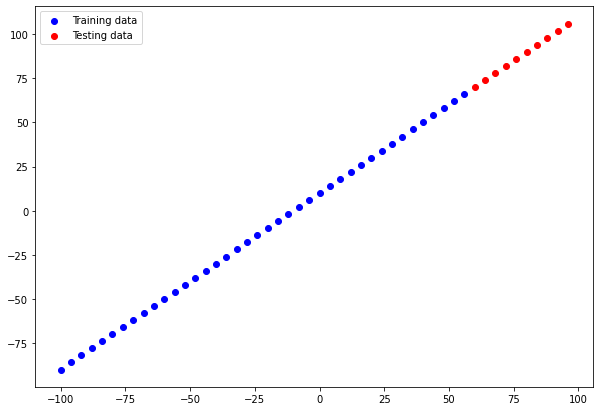

In [ ]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, Y_train, c="b", label = "Training data")

# plot test data in green
plt.scatter(X_test,Y_test,c="r",label ="Testing data" )

# show a legend
plt.legend();

In [ ]:
# let's build a neural network for our data

# 1. Create a model with one layer of neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model with SGD Optimizer first
model.compile(
               optimizer = tf.keras.optimizers.SGD(),
               loss = "mae",
               metrics = ["mae"]
)

# 3. fit the data into model
model.fit(X_train,Y_train,epochs=100,verbose=0)

In [ ]:
# Improve our model by adding some layer with relu activation function
# 1. Create model -  add more layer to our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics =["mae"]
)

# 3. Fit the model
model.fit(X_train, Y_train, epochs= 100,verbose=0)

In [ ]:
# Improve our model by changing opimizer from SGD to Adam

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation = "relu", name = "Input_layer"),
                              tf.keras.layers.Dense(100, activation = "relu", name = "Hidden_layer"),
                             tf.keras.layers.Dense(1, name="Output_layer")
])

# 2. Compling a model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=.1),
    loss = "mae",
    
    metrics = ["mae"]
)

# 3. fit the model
model.fit(X_train, Y_train, epochs = 100, verbose = 0)

In [ ]:
# Now we can see we have a good accuracy lets predict the value
model.predict(X_test), Y_test

(array([[ 70.1254  ],
        [ 74.13758 ],
        [ 78.15126 ],
        [ 82.166595],
        [ 86.16821 ],
        [ 90.15713 ],
        [ 94.14589 ],
        [ 98.13462 ],
        [102.1237  ],
        [106.11747 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 100)               200       
_________________________________________________________________
Hidden_layer (Dense)         (None, 100)               10100     
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


- **Total Params** is the number of parameters in the model.
- **Trainable Params** are the prameters (pattern) the model can update as it trains.
- **Non-tainable Params** are not updated during training (thi id typical when you bring in already learn pattern or prameters from other models during transfer learning). 

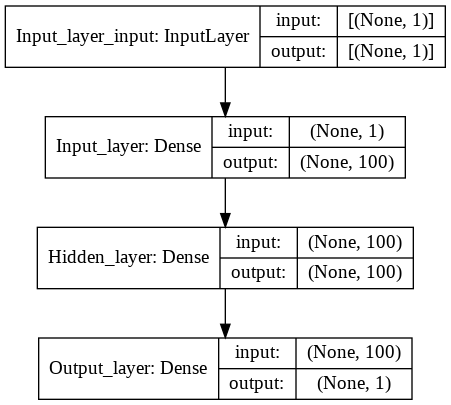

In [ ]:
# Visualize the model
from tensorflow.keras.utils import  plot_model

plot_model(model = model, show_shapes=True)

### Visualizing our model's prediction
- TO visualize prediction , it's a good idea to plot them against the ground truth labels.

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([[ 70.1254  ],
       [ 74.13758 ],
       [ 78.15126 ],
       [ 82.166595],
       [ 86.16821 ],
       [ 90.15713 ],
       [ 94.14589 ],
       [ 98.13462 ],
       [102.1237  ],
       [106.11747 ]], dtype=float32)

In [ ]:
# let's create a ploting function
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = Y_pred):
  """
  Plots training data and test data and compare prediction to ground truth labels.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "Training Data")

  # plot testing data in green 
  plt.scatter(test_data,test_labels, c= "g", label = "Testing data")

  # plot prediction data bases on testing data
  plt.scatter(test_data, predictions, c="r", label="prediction")

  # Show the legends
  plt.legend()

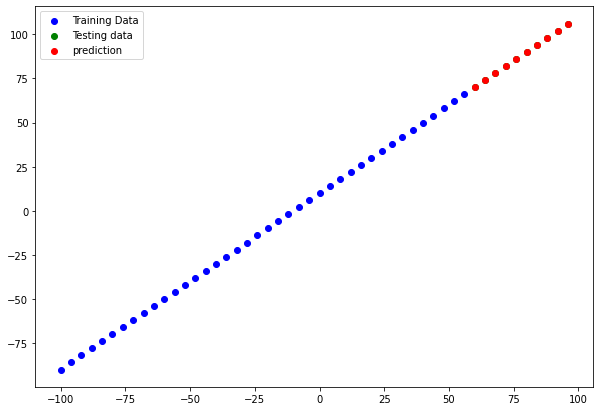

In [ ]:
plot_predictions()

### Evaluating model using Evaluation  matrics
- Depending on which problem there may be different evaluation matrix to evaluate your model performance.

Since we are working on aregression problem, two of the main matrics:
- MAE - mean absolute error which tells on average , how wrong is each of my models prediction 
- MSE - Mean square error, "square the average errors"



In [ ]:
# evaluating the model on test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.1428 - mae: 0.1428


[0.14278563857078552, 0.14278563857078552]

In [ ]:
# calculate mean absolute error

# 1. make all of them in same shape first
print("shape of Y_test is ",tf.shape(Y_test))
print("Shape of Y_pred is ",tf.shape(Y_pred))

# change the shape of Y_pred as Shape of Y_test
Y_pred = tf.squeeze(Y_pred)

print("shape of Y_test is ",tf.shape(Y_test))
print("Shape of Y_pred is ",tf.shape(Y_pred))


shape of Y_test is  tf.Tensor([10], shape=(1,), dtype=int32)
Shape of Y_pred is  tf.Tensor([10], shape=(1,), dtype=int32)
shape of Y_test is  tf.Tensor([10], shape=(1,), dtype=int32)
Shape of Y_pred is  tf.Tensor([10], shape=(1,), dtype=int32)


In [ ]:
# 2. Mean absolute error
tf.metrics.mean_absolute_error(y_true=Y_test, y_pred= Y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.14278564>

In [ ]:
# mean square error
tf.metrics.mean_squared_error(y_true=Y_test, y_pred= Y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.020677915>

In [ ]:
# function to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred= tf.squeeze(y_prd))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

### A new Model

In [3]:
### Lets create a new data
data_X = tf.range(-100, 100, 2)
data_X

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98], dtype=int32)>

In [4]:
data_Y = data_X**2 + 5
data_Y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([10005,  9609,  9221,  8841,  8469,  8105,  7749,  7401,  7061,
        6729,  6405,  6089,  5781,  5481,  5189,  4905,  4629,  4361,
        4101,  3849,  3605,  3369,  3141,  2921,  2709,  2505,  2309,
        2121,  1941,  1769,  1605,  1449,  1301,  1161,  1029,   905,
         789,   681,   581,   489,   405,   329,   261,   201,   149,
         105,    69,    41,    21,     9,     5,     9,    21,    41,
          69,   105,   149,   201,   261,   329,   405,   489,   581,
         681,   789,   905,  1029,  1161,  1301,  1449,  1605,  1769,
        1941,  2121,  2309,  2505,  2709,  2921,  3141,  3369,  3605,
        3849,  4101,  4361,  4629,  4905,  5189,  5481,  5781,  6089,
        6405,  6729,  7061,  7401,  7749,  8105,  8469,  8841,  9221,
        9609], dtype=int32)>

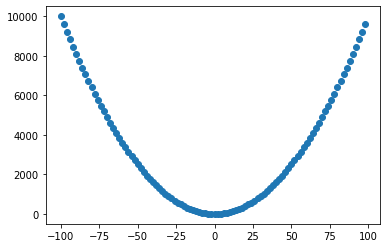

In [5]:
# visuallize the data
plt.scatter(data_X, data_Y)

In [6]:
# split data into trin and test sets

X_train , X_test = data_X[:60],data_X[60:]
X_train, X_test

(<tf.Tensor: shape=(60,), dtype=int32, numpy=
 array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
         -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
         -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
         -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
         -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
          10,   12,   14,   16,   18], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52,
        54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86,
        88, 90, 92, 94, 96, 98], dtype=int32)>)

In [7]:
Y_train , Y_test = data_Y[:60],data_Y[60:]
Y_train, Y_test

(<tf.Tensor: shape=(60,), dtype=int32, numpy=
 array([10005,  9609,  9221,  8841,  8469,  8105,  7749,  7401,  7061,
         6729,  6405,  6089,  5781,  5481,  5189,  4905,  4629,  4361,
         4101,  3849,  3605,  3369,  3141,  2921,  2709,  2505,  2309,
         2121,  1941,  1769,  1605,  1449,  1301,  1161,  1029,   905,
          789,   681,   581,   489,   405,   329,   261,   201,   149,
          105,    69,    41,    21,     9,     5,     9,    21,    41,
           69,   105,   149,   201,   261,   329], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([ 405,  489,  581,  681,  789,  905, 1029, 1161, 1301, 1449, 1605,
        1769, 1941, 2121, 2309, 2505, 2709, 2921, 3141, 3369, 3605, 3849,
        4101, 4361, 4629, 4905, 5189, 5481, 5781, 6089, 6405, 6729, 7061,
        7401, 7749, 8105, 8469, 8841, 9221, 9609], dtype=int32)>)

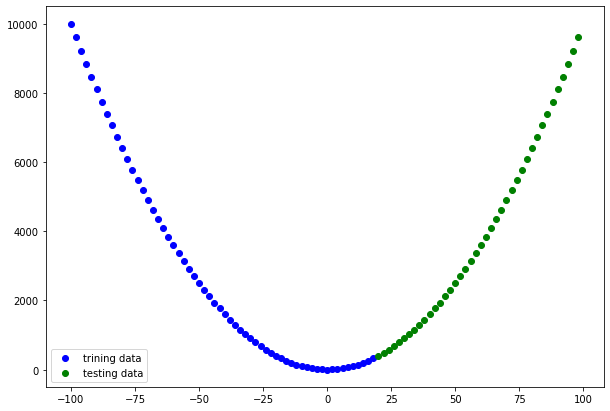

In [8]:
# visualize the data

# specify the size
plt.figure(figsize=(10,7))

# plot training data
plt.scatter(X_train,Y_train,c="b", label="trining data")

# plot test data
plt.scatter(X_test,Y_test, c="g" ,label = "testing data")

# show legend
plt.legend()

**Build the model**

In [10]:
# 1. create a model with one layer
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. compile the model with SGD optimzer
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = "mae",
    metrics = ["mae"]
    )

# 3. fit the model with 100 epochs
model.fit(X_train, Y_train, epochs=100,verbose=0)

In [11]:
Y_pred_1 = model.predict(X_test)
Y_pred_1

array([[-1165.666 ],
       [-1282.3219],
       [-1398.9777],
       [-1515.6335],
       [-1632.2893],
       [-1748.9452],
       [-1865.601 ],
       [-1982.2567],
       [-2098.9126],
       [-2215.5684],
       [-2332.224 ],
       [-2448.8801],
       [-2565.536 ],
       [-2682.1917],
       [-2798.8474],
       [-2915.5032],
       [-3032.1592],
       [-3148.815 ],
       [-3265.4707],
       [-3382.1265],
       [-3498.7825],
       [-3615.4382],
       [-3732.094 ],
       [-3848.7498],
       [-3965.4055],
       [-4082.0615],
       [-4198.7173],
       [-4315.373 ],
       [-4432.029 ],
       [-4548.6846],
       [-4665.3403],
       [-4781.996 ],
       [-4898.6523],
       [-5015.308 ],
       [-5131.964 ],
       [-5248.6196],
       [-5365.2754],
       [-5481.931 ],
       [-5598.587 ],
       [-5715.2427]], dtype=float32)

In [12]:
# calculate mean absolute error

# first check the shape of Y_test and Y_pred
tf.shape(Y_test), tf.shape(Y_pred_1)

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([40], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([40,  1], dtype=int32)>)

In [13]:
# shape of Y_pred_1 is more hence squeeze it
Y_pred_1 = tf.squeeze(Y_pred_1)
tf.shape(Y_pred_1)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([40], dtype=int32)>

In [14]:
# calculate mean absolute error
tf.metrics.mean_absolute_error(y_true= Y_test, y_pred= Y_pred_1)

<tf.Tensor: shape=(), dtype=float32, numpy=7459.4546>

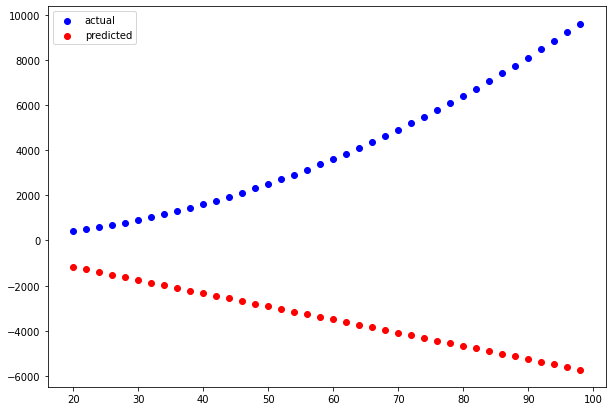

In [15]:
# visualize the actual and predicted value
plt.figure(figsize = (10,7))

plt.scatter(X_test,Y_test, c="b",label = "actual")

plt.scatter(X_test,Y_pred_1, c="r", label = "predicted")

plt.legend()

**lets improve the model-1**
- add one more layer

In [16]:
# create model2 
model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation="relu"),
                              tf.keras.layers.Dense(1)
])

# compile the model
model2.compile(
    optimizer= tf.keras.optimizers.SGD(),
    loss = "mae",
    metrics = ["mae"]
)

# fit the training data
model2.fit(
    X_train,
    Y_train,
    epochs = 100,
    verbose=0
)

In [17]:
Y_pred_2 = model2.predict(X_test)

**Add Adam optimzer in place of SGD**

In [19]:

model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation = "relu"),
                              tf.keras.layers.Dense(1)
])

# compile model
model3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=.1),
    loss="mae",
    metrics = ["mae"]
)

# fit data
model3.fit(
    X_train,
    Y_train,
    epochs = 500, 
    verbose=0
)

In [20]:
# predict
Y_pred_3 = model3.predict(X_test)
Y_pred_3

array([[ 387.92294],
       [ 448.9305 ],
       [ 510.35858],
       [ 572.2229 ],
       [ 635.49585],
       [ 699.1398 ],
       [ 763.0174 ],
       [ 826.9239 ],
       [ 890.8853 ],
       [ 955.43097],
       [1020.30066],
       [1085.1721 ],
       [1150.0436 ],
       [1214.9153 ],
       [1279.787  ],
       [1344.6587 ],
       [1409.5302 ],
       [1474.4017 ],
       [1539.2734 ],
       [1604.1448 ],
       [1669.0166 ],
       [1733.8881 ],
       [1798.7598 ],
       [1863.6313 ],
       [1928.5029 ],
       [1993.3746 ],
       [2058.2463 ],
       [2123.118  ],
       [2187.9895 ],
       [2252.8806 ],
       [2317.7776 ],
       [2382.6746 ],
       [2447.5718 ],
       [2512.4685 ],
       [2577.3655 ],
       [2642.2627 ],
       [2707.1597 ],
       [2772.057  ],
       [2836.9539 ],
       [2901.8508 ]], dtype=float32)

In [21]:
# evaluate
model3.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2380.9976 - mae: 2380.9976


[2380.99755859375, 2380.99755859375]

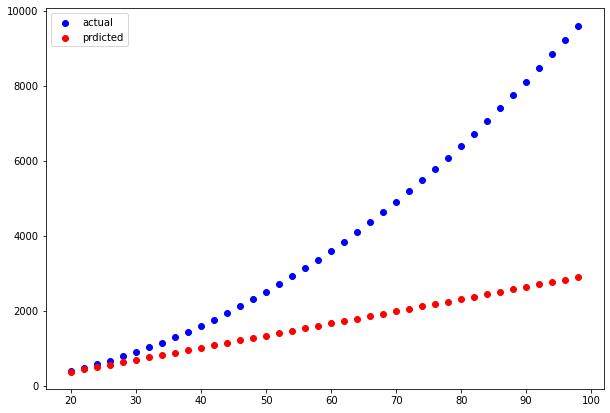

In [22]:

# visulaize the predicted and actual again
plt.figure(figsize=(10,7))

plt.scatter(X_test,Y_test, c="b", label = "actual")

plt.scatter(X_test,Y_pred_3, c="r", label="prdicted")

plt.legend()

**Add one more layer to the model**

In [31]:
tf.random.set_seed(42)
# add one more / 3 layers
model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation="relu",name="input_layer-01"),
                              tf.keras.layers.Dense(200, activation="relu", name="Hidden_layer"),
                              tf.keras.layers.Dense(1,name="output_layer")
]) 

model4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= .1),
    loss = "mae",
    metrics = ["mae"]
)

model4.fit(X_train, Y_train, epochs = 500, verbose=0)

In [32]:
# summary of model 4
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer-01 (Dense)       (None, 100)               200       
_________________________________________________________________
Hidden_layer (Dense)         (None, 200)               20200     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 201       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


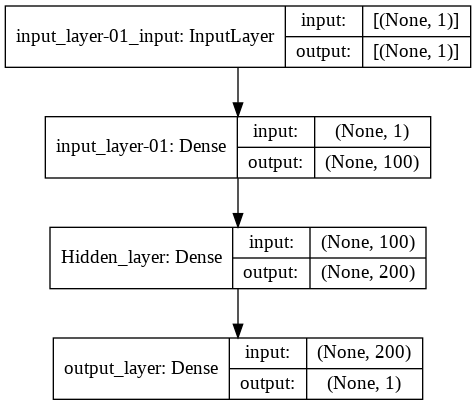

In [33]:
# plot the model block diagram
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes=True)

In [39]:
# Y predicted
Y_pred_4 = model4.predict(X_test) 

In [40]:
# evaluate the model
model4.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 302.4579 - mae: 302.4579


[302.45794677734375, 302.45794677734375]

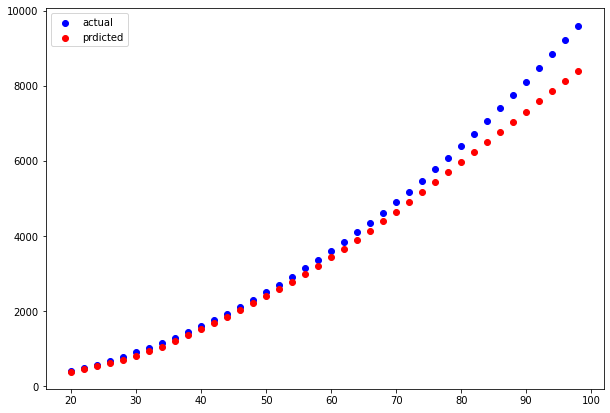

In [41]:
# visualize the data

# visulaize the predicted and actual again
plt.figure(figsize=(10,7))

plt.scatter(X_test,Y_test, c="b", label = "actual")

plt.scatter(X_test,Y_pred_4, c="r", label="prdicted")

plt.legend()

**One more experiment**I

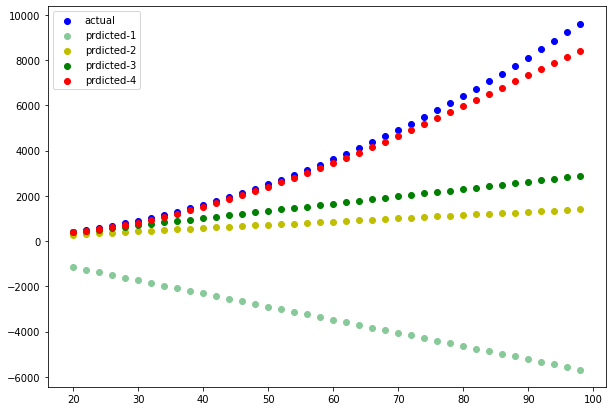

In [ ]:
# visualize the data

# visulaize the predicted and actual again
plt.figure(figsize=(10,7))

plt.scatter(X_test,Y_test, c="b", label = "actual")

plt.scatter(X_test,Y_pred_1, color = '#88c999', label="prdicted-1")
plt.scatter(X_test,Y_pred_2, c="y", label="prdicted-2")


plt.scatter(X_test,Y_pred_3, c="g", label="prdicted-3")
plt.scatter(X_test,Y_pred_4, c="r", label="prdicted-4")

plt.legend()

## Training Your Experiments
One really good habiot in Machine Learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Lucily, there are tools to help us !

**Resources**: As we build more models , we will use 
- TensorBoard - A component in tensorflow library to help track of modelling experiment.

- Weight and Biases - A tool for tracking all kind of machine learning experiment.(plugs stright to tensor board) 

## Saving Our Model
Saving our model allows us to use them outside of Google Colab(or wherever they were trained) such as in a web application or a mobile app.

There are two main format we can save our model's too :
1. The Save Model Format
2. The HDF5 Format(Hirarchical data format)

In [43]:
# save model using save model format
model4.save("suarePlus10")

INFO:tensorflow:Assets written to: suarePlus10/assets


INFO:tensorflow:Assets written to: suarePlus10/assets


In [44]:
# save model using HDF5 format
model4.save("squarePlus10_HDF5.h5")

## Loading a Saved Model

In [45]:
# laoding the SavedModel Format Model
loaded_SavedModel_format = tf.keras.models.load_model("/content/suarePlus10")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer-01 (Dense)       (None, 100)               200       
_________________________________________________________________
Hidden_layer (Dense)         (None, 200)               20200     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 201       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


In [46]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer-01 (Dense)       (None, 100)               200       
_________________________________________________________________
Hidden_layer (Dense)         (None, 200)               20200     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 201       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


In [48]:
# compare mode4 prediction with saved model prediction
model4.predict([10])

array([[107.95699]], dtype=float32)

In [50]:
loaded_SavedModel_format.predict([10])

array([[107.95699]], dtype=float32)

In [52]:
#load model with h5 format
loaded_HDF5_format = tf.keras.models.load_model("squarePlus10_HDF5.h5")
loaded_HDF5_format.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer-01 (Dense)       (None, 100)               200       
_________________________________________________________________
Hidden_layer (Dense)         (None, 200)               20200     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 201       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


In [56]:
model4.predict([10]), loaded_HDF5_format.predict([10]), loaded_SavedModel_format.predict([10])

(array([[107.95699]], dtype=float32),
 array([[107.95699]], dtype=float32),
 array([[107.95699]], dtype=float32))

## Download Files From codelab

In [58]:
from google.colab import files
files.download("/content/model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
!ls

drive  model.png  sample_data  squarePlus10_HDF5.h5  suarePlus10
